In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product i.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product I,Anti Alergic,January,2019,50833,600282,1024825,1
2019-02-01,Product I,Anti Alergic,February,2019,65670,775491,1323949,2
2019-03-01,Product I,Anti Alergic,March,2019,89667,1058869,1807743,3
2019-04-01,Product I,Anti Alergic,April,2019,60960,719871,1228992,4
2019-05-01,Product I,Anti Alergic,May,2019,43410,512625,875173,5
2019-06-01,Product I,Anti Alergic,June,2019,38023,449010,766568,6
2019-07-01,Product I,Anti Alergic,July,2019,39097,461693,788220,7
2019-08-01,Product I,Anti Alergic,August,2019,54870,647955,1106214,8
2019-09-01,Product I,Anti Alergic,September,2019,66773,788516,1346186,9


In [4]:
sales_i= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_i.shape

(60, 3)

In [6]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_i['Sales'].sum())
print('Total Market Size:',sales_i['Market Size'].sum())
print('Total Marketing Expense:', sales_i['Marketing Expense'].sum())

Total Sales: 5783407
Total Market Size: 67317237
Total Marketing Expense: 103103398


Text(0.5, 1.0, 'Product I')

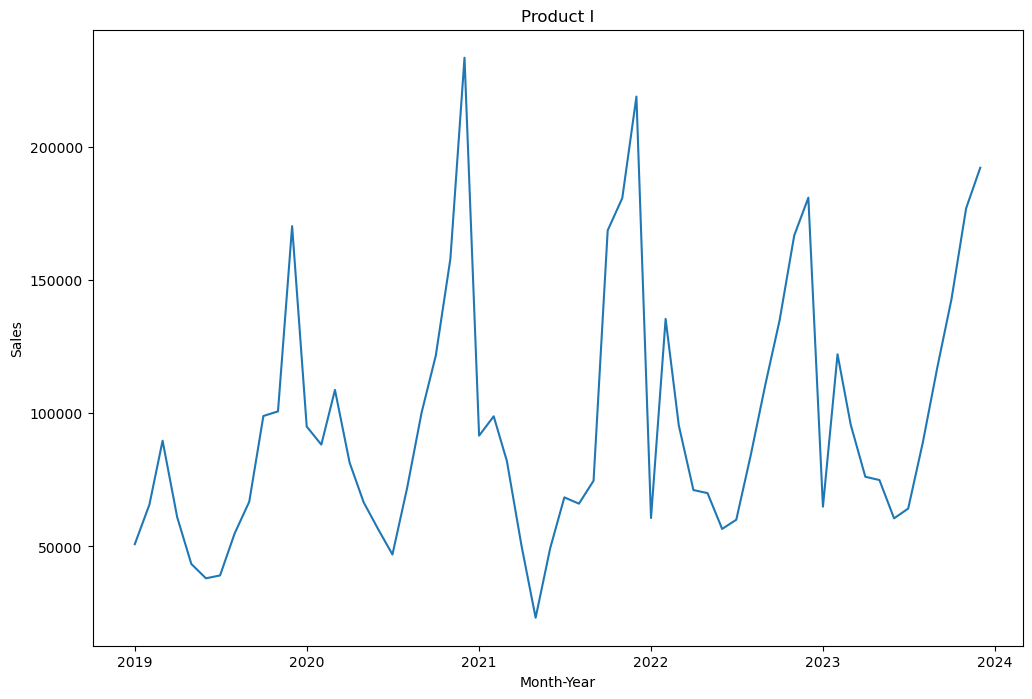

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_i['Sales'])
plt.title('Product I')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_i['Sales'])

ADF Statistics: -2.5790376657087335
p- value: 0.09740761251652458
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_i_diff= sales_i['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product I - First Difference')

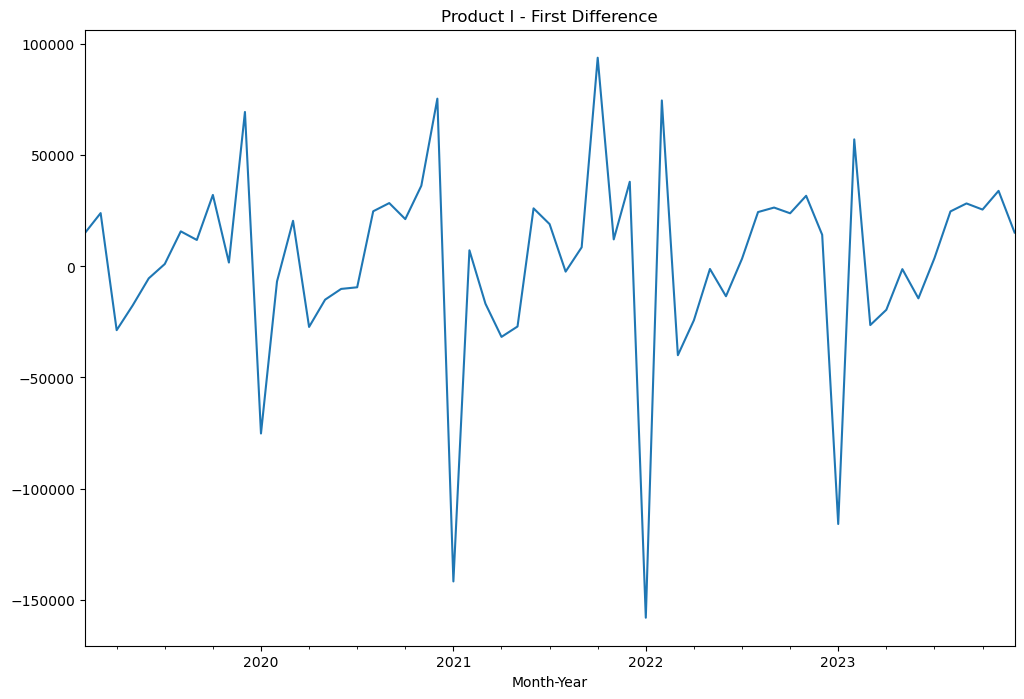

In [13]:
sales_i_diff.plot(figsize=(12,8))
plt.title('Product I - First Difference')

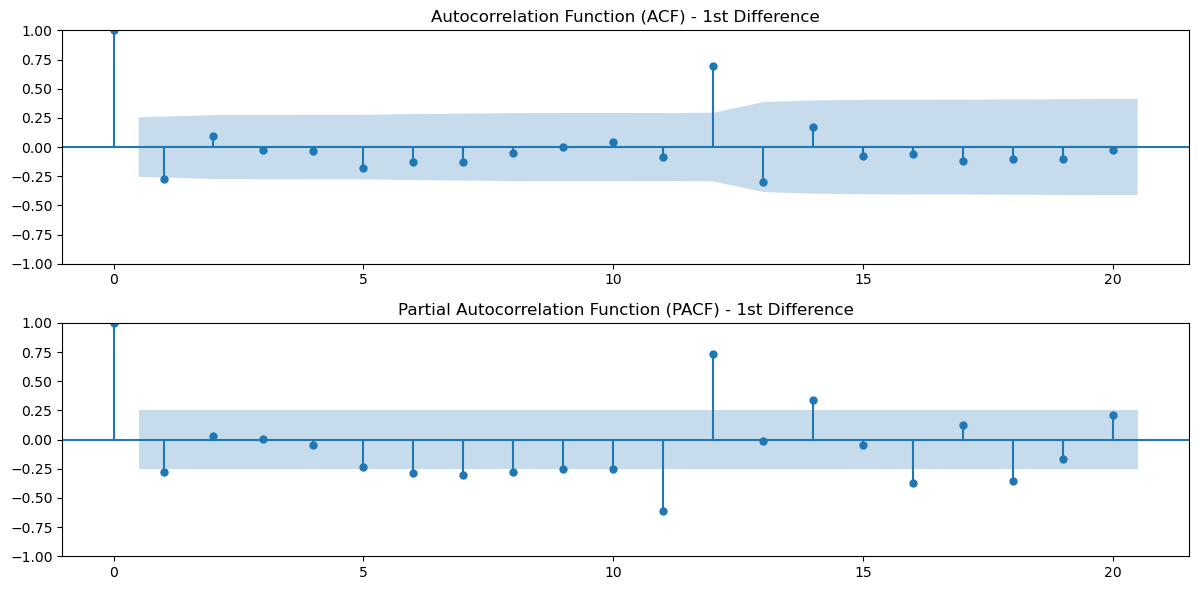

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_i_diff)

ADF Statistics: -3.6173278718862623
p- value: 0.005438267272077221
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_i[:48]
test=sales_i[48:]

In [17]:
len(train)

48

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
4   1  1  1107.458626  1116.709364  18917.728597  7.264611e+08  26952.942839
7   2  1  1108.330830  1119.431715  20050.872934  7.662007e+08  27680.330189
2   0  2  1108.412744  1117.663482  20514.456098  7.801116e+08  27930.477241
1   0  1  1108.416205  1115.816795  16589.206863  6.797367e+08  26071.761385
10  3  1  1110.263721  1123.214754  20406.861980  7.782398e+08  27896.949728
5   1  2  1110.337333  1121.438218  20736.187583  7.880859e+08  28072.867618
8   2  2  1112.155804  1125.106837  20449.994916  7.786735e+08  27904.722578
13  4  1  1112.649024  1127.450205  20420.050256  7.781884e+08  27896.028287
11  3  2  1113.692392  1128.493573  20193.591296  7.714252e+08  27774.542188
9   3  0  1114.269467  1125.370353  13399.064575  4.218573e+08  20539.166183
14  4  2  1114.733504  1131.384832  20370.679277  7.762969e+08  27862.104667
12  4  0  1114.781222  1127.732255  13188.993266  4.887329e+08  22107.304159

In [23]:
m_arima= ARIMA(train['Sales'], order=(1,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -548.729
Date:                Thu, 09 May 2024   AIC                           1107.459
Time:                        18:44:11   BIC                           1116.709
Sample:                    01-01-2019   HQIC                          1110.940
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1057      0.016      6.490      0.000       0.074       0.138
Marketing Expense    -0.0230      0.012     -1.994      0.046      -0.046      -0.000
ar.L1                -0.

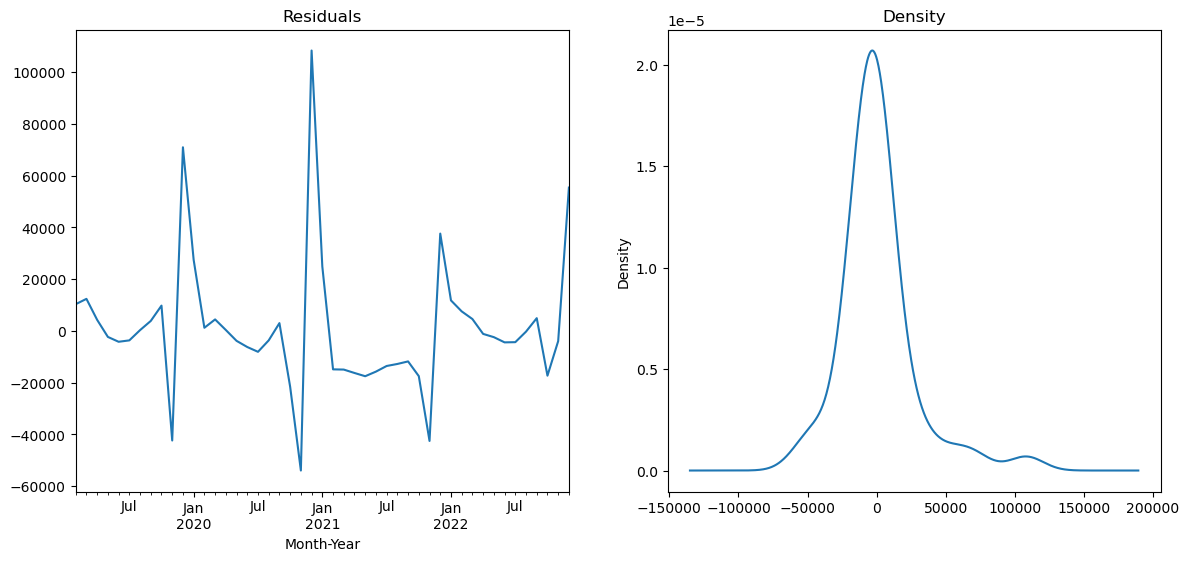

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

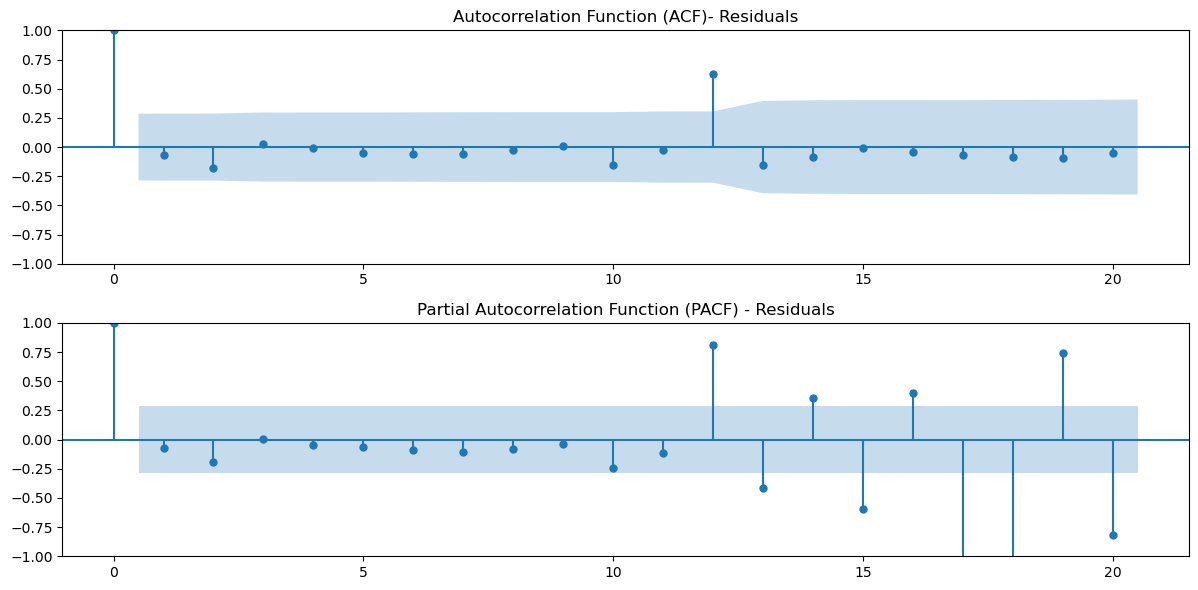

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

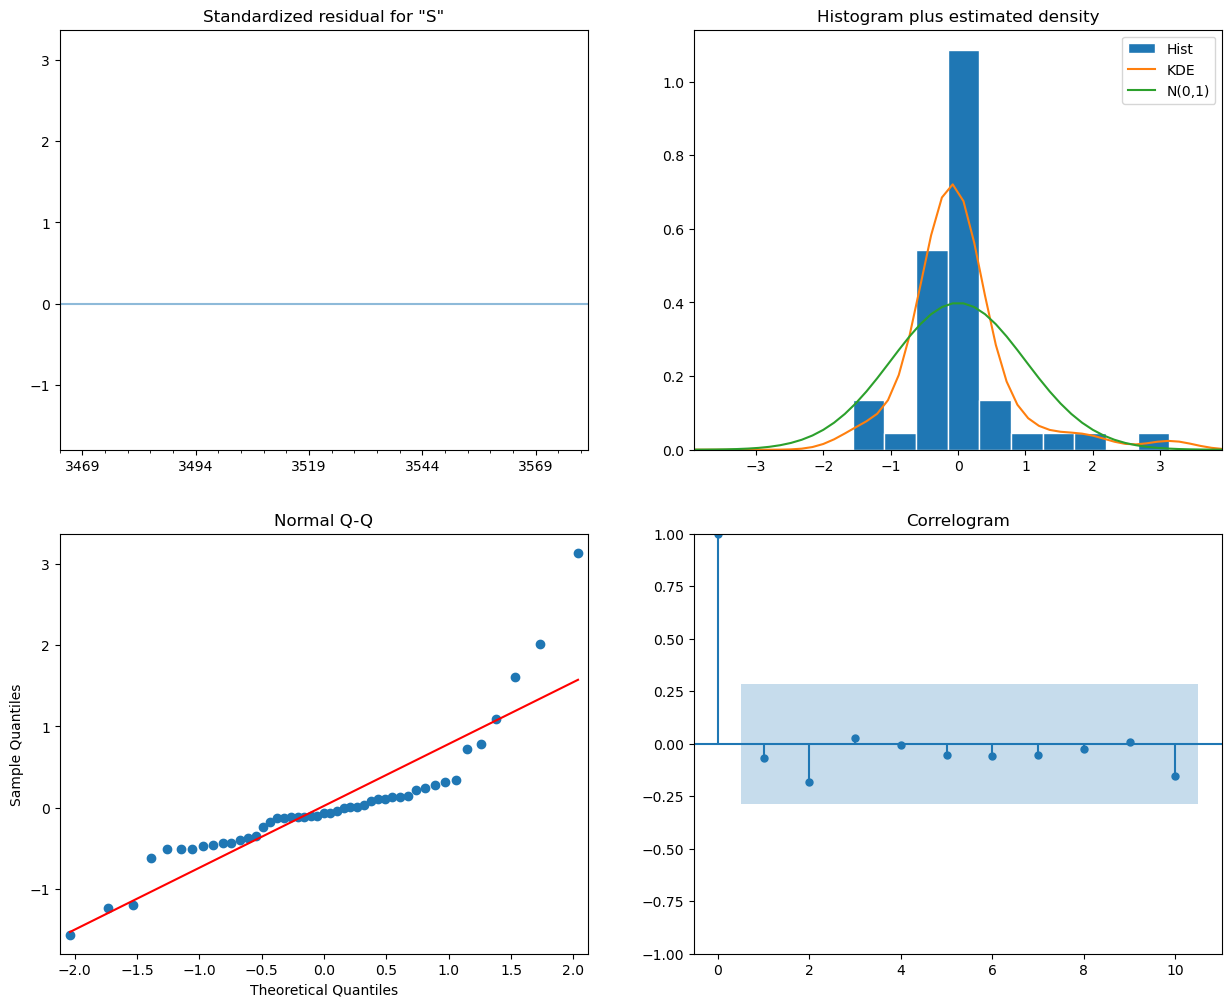

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_i['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

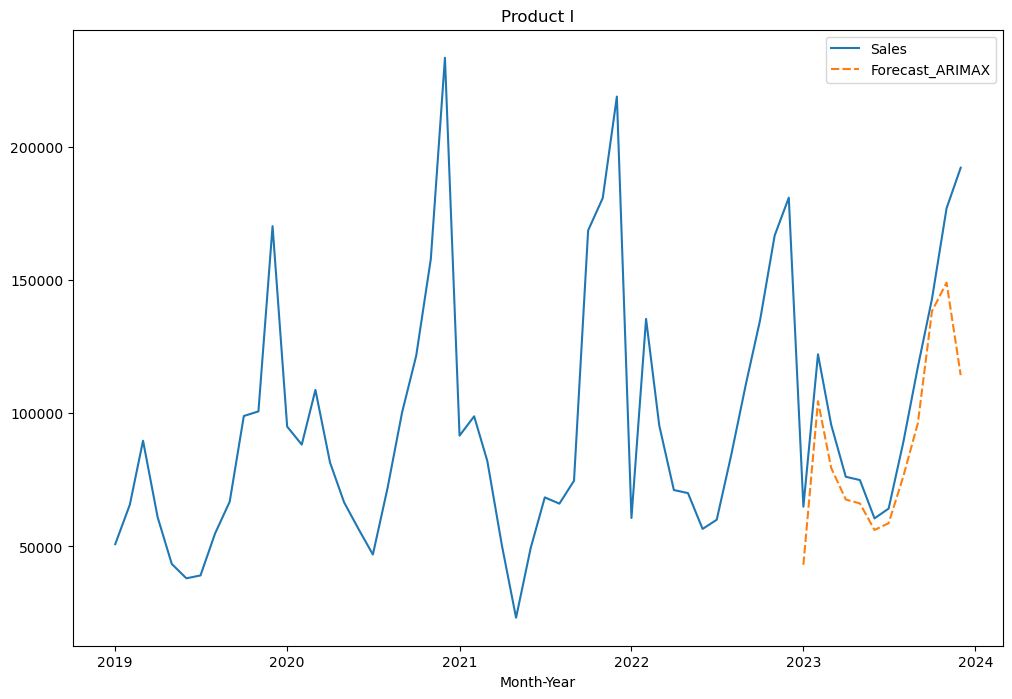

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_ARIMAX']])
plt.title('Product I')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 18917.728596526726
MAPE - ARIMAX: 0.1629133209616154
MSE - ARIMAX: 726461127.7051011
RMSE - ARIMAX: 26952.9428394211


# SARIMA

In [33]:
import statsmodels.api as sm

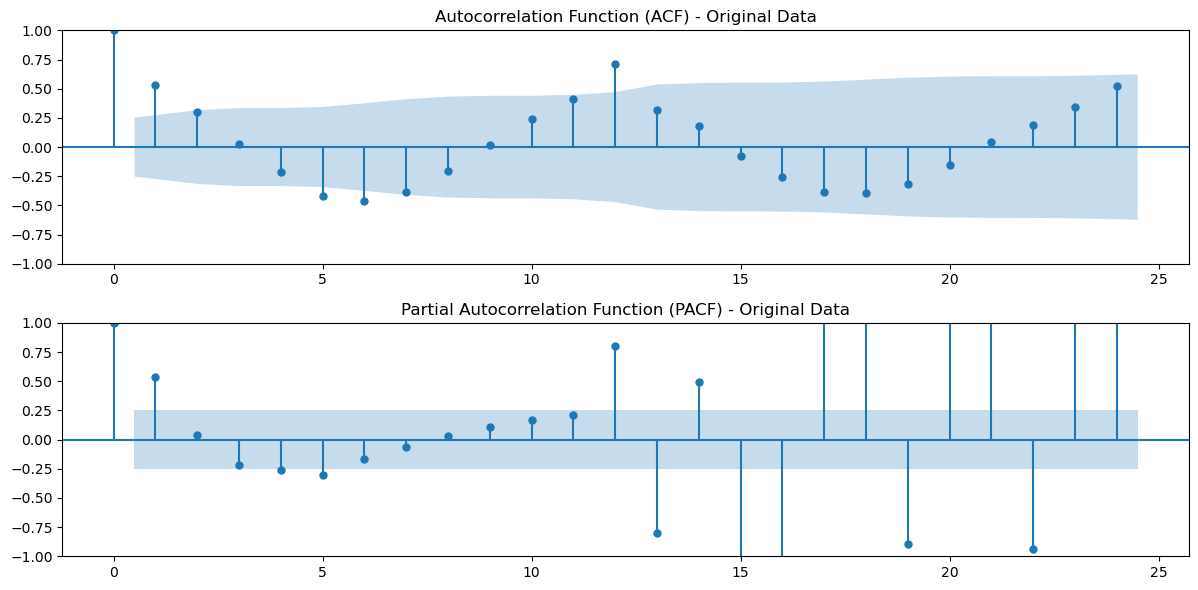

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

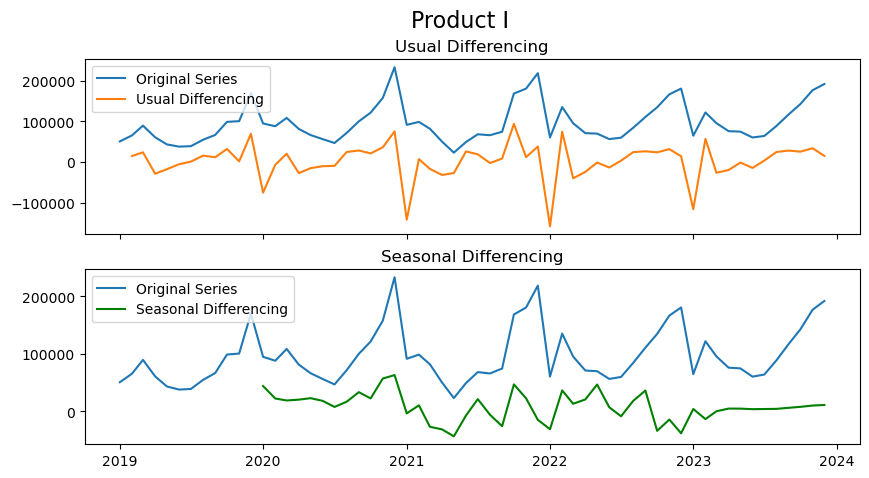

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_i['Sales'], label='Original Series')
axes[0].plot(sales_i['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_i['Sales'], label='Original Series')
axes[1].plot(sales_i['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product I', fontsize=16)
plt.show()

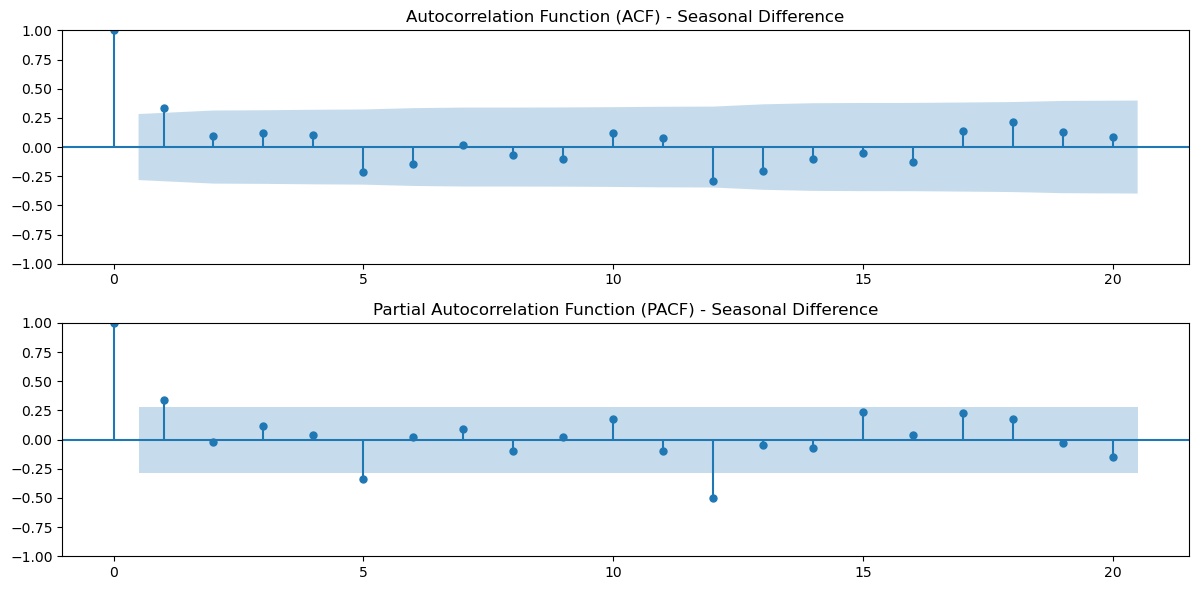

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

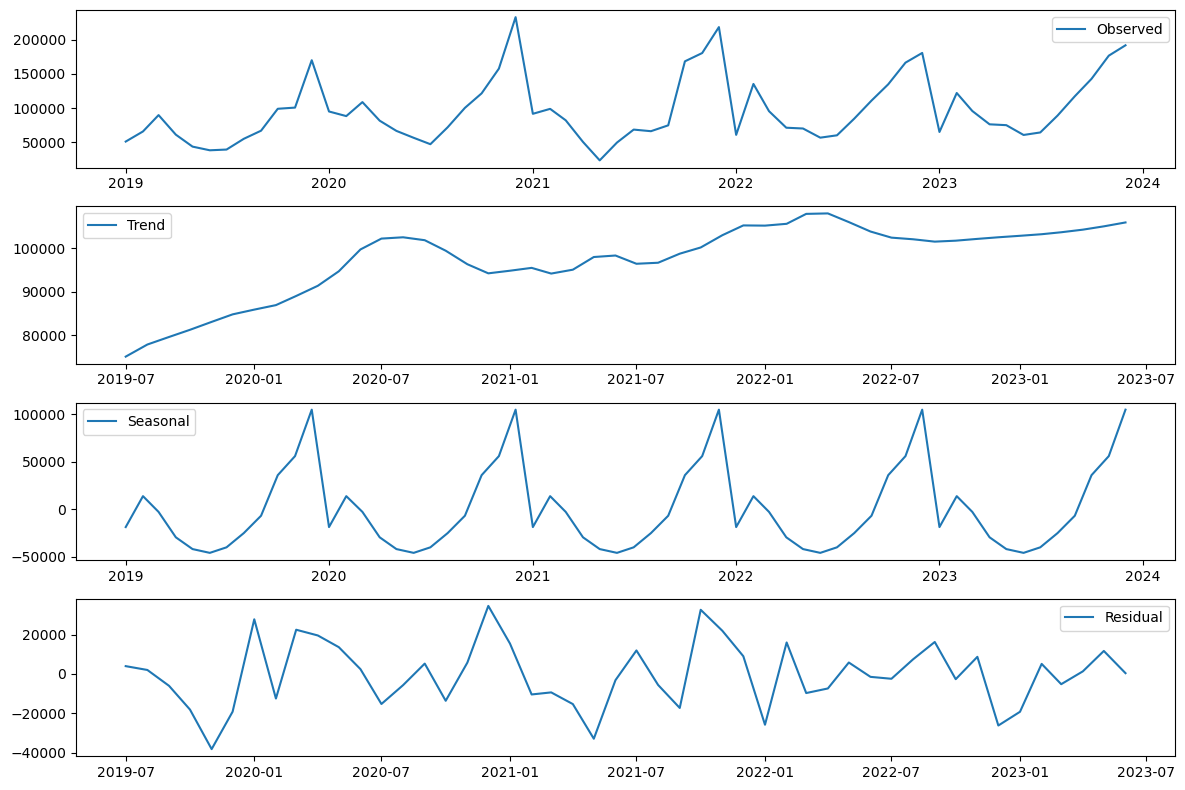

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_i['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic          mae           mse
4  2  0  794.565660  805.453097  8056.610854  1.500241e+08
6  3  0  796.333249  808.776033  8170.718056  1.300365e+08
5  2  1  796.345496  808.788281  8123.933194  1.277133e+08
7  3  1  798.333332  812.331465  8166.299982  1.300014e+08
0  0  0  800.868967  808.645707  7838.831548  9.931433e+07
3  1  1  801.223483  812.110919  5561.469554  9.344207e+07
1  0  1  802.740580  812.072668  5686.206932  7.093797e+07
2  1  0  802.848355  812.180443  7506.325223  9.417782e+07


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -390.283
Date:                             Thu, 09 May 2024   AIC                            794.566
Time:                                     18:46:10   BIC                            805.453
Sample:                                 01-01-2019   HQIC                           798.324
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1075      0.031      3.488      0.000       0.047       0.168
Market

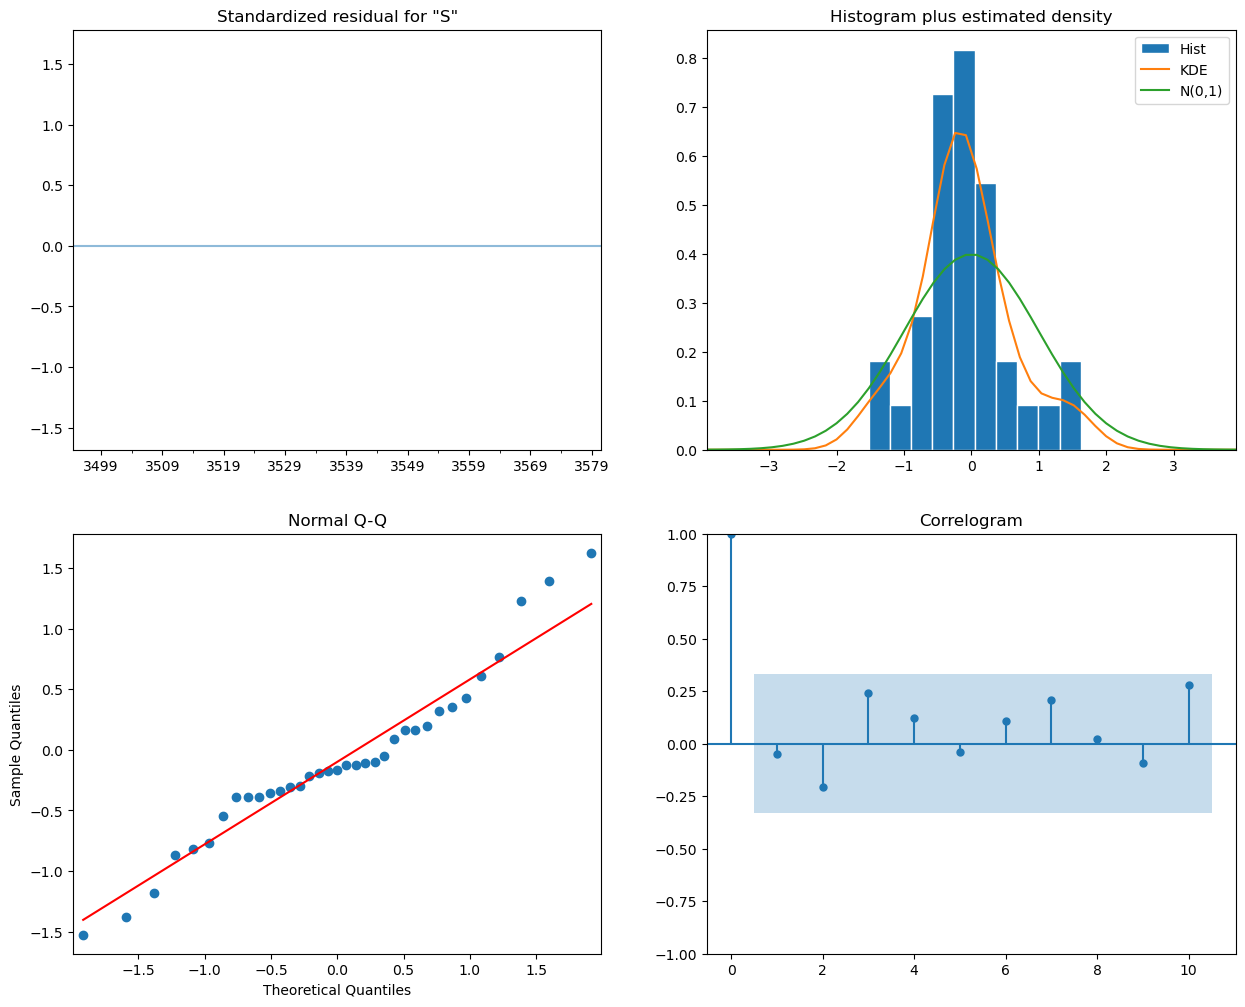

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_i['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product I')

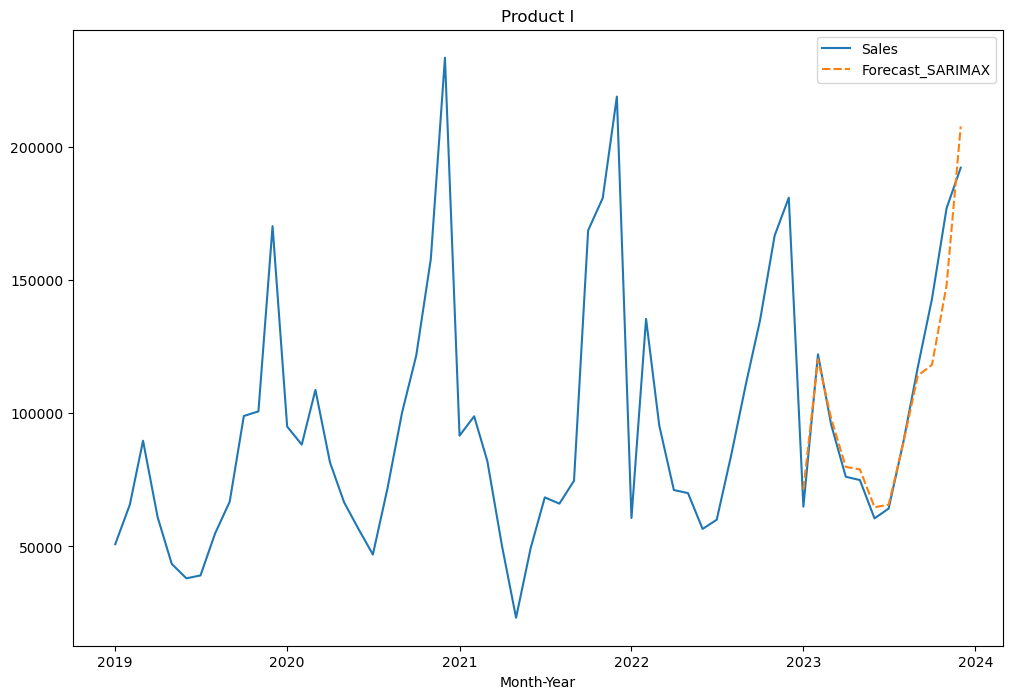

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_SARIMAX']])
plt.title('Product I')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 8056.611
MAPE - SARIMAX: 0.065
MSE - SARIMAX: 150024118.787
RMSE - SARIMAX: 12248.433


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=827.086, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=827.476, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=829.411, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=827.513, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=829.473, Time=0.35 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=829.397, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=830.512, Time=0.76 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=831.947, Time=1.23 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=829.551, Time=1.40 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=831.430, Time=1.65 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=833.330, Time=4.07 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=831.551, Time=1.86 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=833.430, Time=2.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=825.658, Time=0.07 sec
 ARIMA(0,1,1)(

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [49]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -409.063
Date:                             Thu, 09 May 2024   AIC                            824.125
Time:                                     18:48:14   BIC                            828.791
Sample:                                 01-01-2019   HQIC                           825.736
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5469      0.263      2.082      0.037       0.032       1.062
ma.L1         -0.8901      0.134     -6.634      0.000      -1.153      -0.627
sigma2      8.933e+08   9.66e-11   9.25e+18      0.000    8.93e+08    8.93e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.39   Prob(JB):                         0.55
Heteroskedasticity (H):               1.62   Skew:                             0.45
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.33e+34. Standard errors may be unstable.
"""

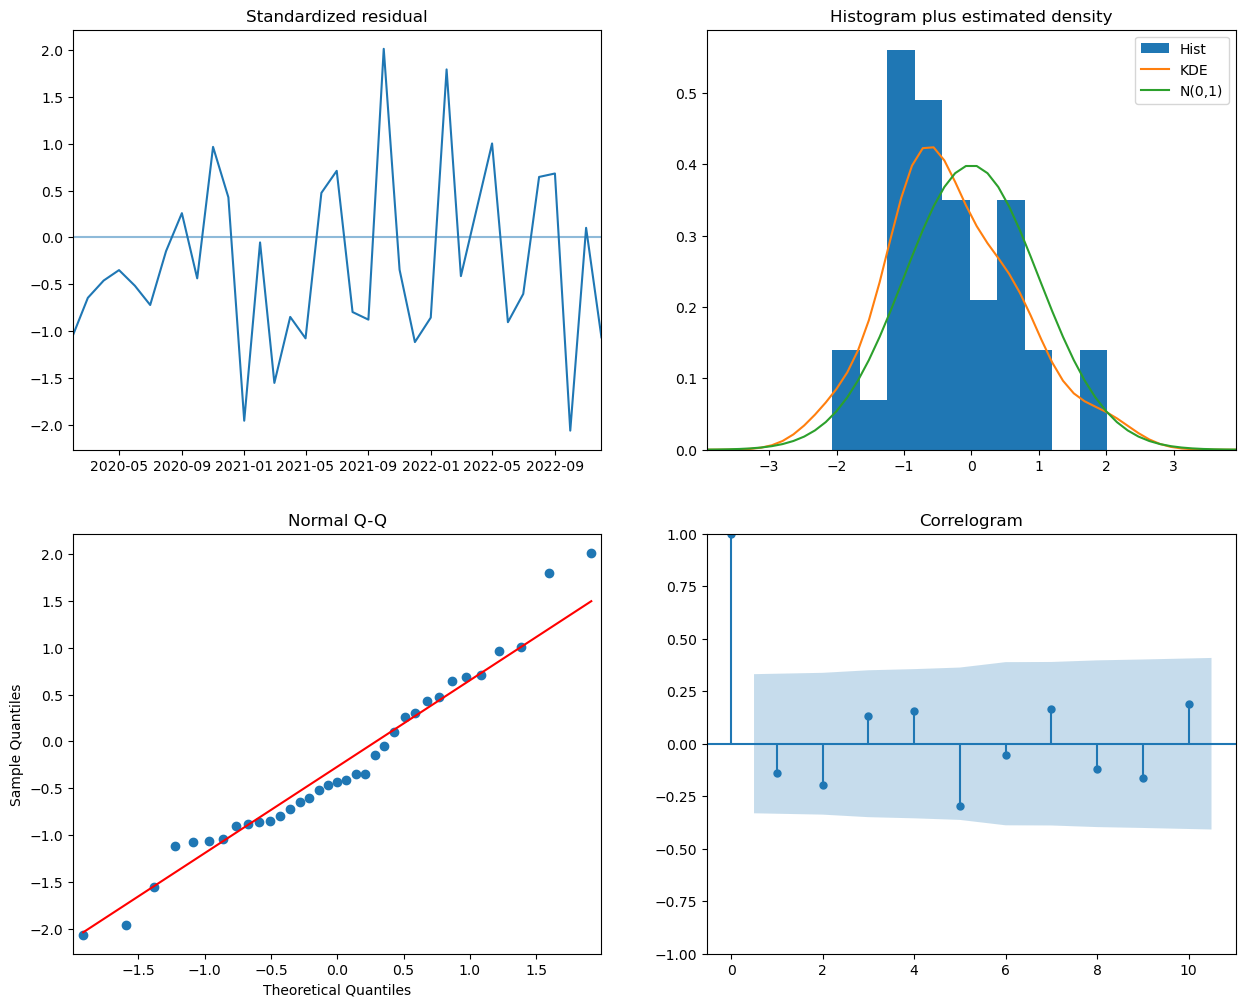

In [50]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [51]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product I')

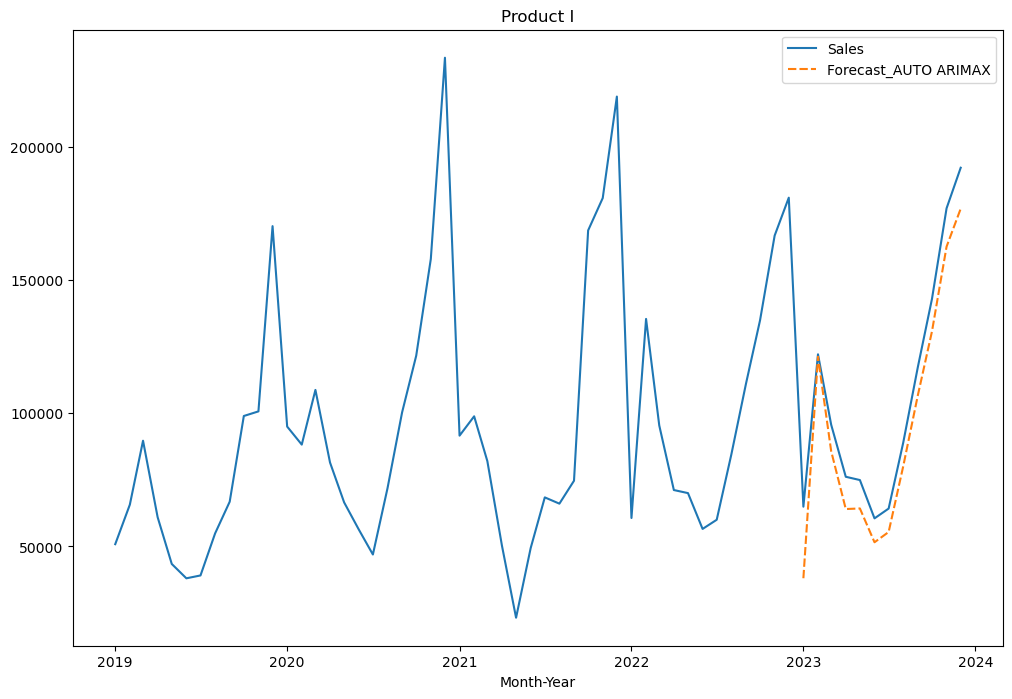

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product I')

In [53]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 11638.831320175823
MAPE - AUTO ARIMAX: 0.12903924292009727
MSE - AUTO ARIMAX: 168453368.30581394
RMSE - AUTO ARIMAX: 12978.958675711005


In [54]:
sales_i.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,64906,802857,1699017,43092.613099,71447.572506,38049.808476
2023-02-01,122096,1510270,3196056,104471.852082,120227.389111,121155.672756
2023-03-01,95682,1183541,2504628,79464.212721,98013.259748,85756.495906
2023-04-01,76134,941742,1992928,67593.920990,79833.229577,64022.260553
2023-05-01,74900,926478,1960626,66139.248289,78898.202763,64240.635618
2023-06-01,60518,748579,1584154,56164.689376,64688.151690,51549.574242
2023-07-01,64200,794124,1680537,58710.054679,65660.070281,55400.679365
2023-08-01,88953,1100307,2328485,76197.777904,88702.766009,80091.946001
2023-09-01,117297,1450909,3070434,96199.005900,114096.373331,106703.586565


In [55]:
sales_i.mean()

Sales                   9.639012e+04
Market Size             1.121954e+06
Marketing Expense       1.718390e+06
Forecast_ARIMAX         8.746452e+04
Forecast_SARIMAX        1.046063e+05
Forecast_AUTO ARIMAX    9.474342e+04
dtype: float64

In [56]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,18917.728597,0.162913,7.264611e+08,26952.942839
AUTO ARIMAX,11638.831320,0.129039,1.684534e+08,12978.958676
SEASONAL ARIMAX,8056.610854,0.065124,1.500241e+08,12248.433320


# TESTING

In [41]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=842.476, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=840.908, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=841.351, Time=0.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=842.423, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=841.971, Time=0.14 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=841.615, Time=0.52 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=840.203, Time=0.24 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=840.456, Time=0.48 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=842.398, Time=0.65 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=838.923, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=838.769, Time=0.24 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=840.451, Time=0.27 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=839.234, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=840.620, Time=0.24 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=840.919, Time=0.75 sec
 ARIMA(0,0

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [42]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -416.300
Date:                            Wed, 08 May 2024   AIC                            838.600
Time:                                    20:09:40   BIC                            843.351
Sample:                                01-01-2019   HQIC                           840.259
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4785.5369   4443.545      1.077      0.281   -3923.651    1.35e+04
ar.L1          0.2928      0.138      2.116      0.034       0.022       0.564
sigma2      6.606e+08      0.007   9.36e+10      0.000    6.61e+08    6.61e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.67   Prob(JB):                         0.66
Heteroskedasticity (H):               1.86   Skew:                             0.05
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+27. Standard errors may be unstable.
"""

In [44]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product I')

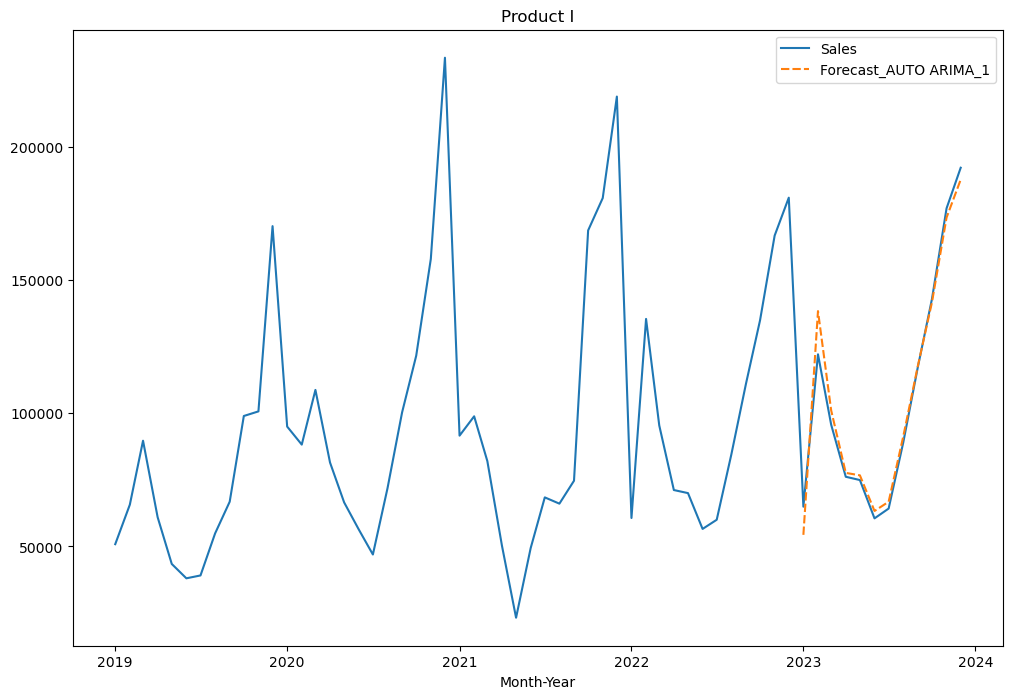

In [45]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product I')

In [47]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 4383.666395572744
MAPE - AUTO ARIMA: 0.04675963544893746
MSE - AUTO ARIMA: 38494965.62600728
RMSE - AUTO ARIMA: 6204.431128315253
